In [ ]:
import pandas as pd

# Read the dataset
data = pd.read_csv('/content/Merged_all.csv')  # Replace '/path/to/dataset.csv' with the actual path to your dataset

# Create new columns for longitude and latitude in km
data['Longitude_km'] = data['ADJ_LONGITUDE'] * 111
data['Latitude_km'] = data['ADJ_LATITUDE'] * 111

data = data.drop(['ADJ_LONGITUDE', 'ADJ_LATITUDE'], axis=1)

# Print the updated dataset
print(data)


          CELL_KEY_H   MEAN_RSRP  INSTANCE_COUNT  CELL_AZIMUTH  Longitude_km  \
0       2.563472e+07 -105.200000             7.0         120.0     -0.305583   
1       2.563472e+07  -94.570093           225.0         120.0     -0.003774   
2       2.563472e+07  -82.573770           648.0         120.0     -0.386058   
3       2.563472e+07 -100.000000            23.0         120.0     -0.084249   
4       2.563472e+07 -101.000000             2.0         120.0      0.056610   
...              ...         ...             ...           ...           ...   
192505  4.227559e+09 -102.000000             1.0         180.0      0.475080   
192506  4.227559e+09  -75.666667             6.0         180.0      0.072594   
192507  4.227559e+09 -103.000000             2.0         180.0     -0.350094   
192508  4.227559e+09  -90.000000             1.0         180.0     -0.350094   
192509  4.227559e+09  -65.000000             1.0         180.0     -0.007881   

        Latitude_km  
0          0.2892

In [ ]:
data.to_csv('NewSample.csv', index=True)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['CELL_KEY_H'] = data['CELL_KEY_H'].astype('category')
# Fit and transform the label encoder on the 'CELL_KEY_H' column
data['CELL_KEY_H'] = le.fit_transform(data['CELL_KEY_H'])

# Now 'CELL_KEY_H' is a categorical variable with numerical labels

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Load the dataset
data = pd.read_csv('/content/NewSample.csv')

# Prepare the input features (X) and target variable (y)
X = data[['CELL_KEY_H', 'MEAN_RSRP', 'INSTANCE_COUNT', 'Longitude_km', 'Latitude_km']]
y = data['CELL_AZIMUTH']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
regression_model = LinearRegression()

# Train the regression model
regression_model.fit(X_train, y_train)

# Evaluate the regression model
regression_score = regression_model.score(X_test, y_test)
print("Regression Model R^2 Score:", regression_score)




Regression Model R^2 Score: 0.01972275787529265


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Predict the values using the regression model
regression_pred = regression_model.predict(X_test)

# Calculate the mean squared error (MSE)
regression_mse = mean_squared_error(y_test, regression_pred)

# Calculate the root mean squared error (RMSE)
regression_rmse = mean_squared_error(y_test, regression_pred, squared=False)

# Calculate the mean absolute error (MAE)
regression_mae = mean_absolute_error(y_test, regression_pred)

print("Regression Model Metrics:")
print("MSE:", regression_mse)
print("RMSE:", regression_rmse)
print("MAE:", regression_mae)


Regression Model Metrics:
MSE: 8433.118871811012
RMSE: 91.83201441660208
MAE: 79.57268858624268


# Leraning Curve

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_errors = []
test_errors = []

In [ ]:
training_sizes = np.linspace(0.1, 1.0, 10, endpoint=True)

In [ ]:
for size in training_sizes:
    # Calculate the number of samples based on the fraction of training data
    num_samples = int(len(X_train) * size)

    # Create a linear regression model
    rf_regressor = LinearRegression()

    # Fit the model to the training data
    rf_regressor.fit(X_train[:num_samples], y_train[:num_samples])

    # Predict on both training and testing data
    y_train_pred = rf_regressor.predict(X_train)
    y_test_pred = rf_regressor.predict(X_test)

    # Calculate Mean Squared Error for training and testing data
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)

    # Append errors to the lists
    train_errors.append(train_mse)
    test_errors.append(test_mse)

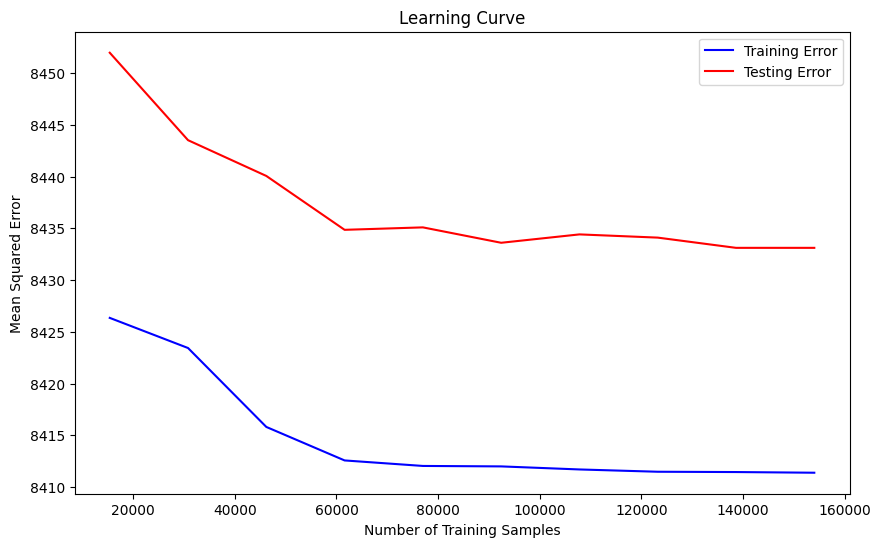

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(training_sizes * len(X_train), train_errors, label='Training Error', color='blue')
plt.plot(training_sizes * len(X_train), test_errors, label='Testing Error', color='red')
plt.xlabel('Number of Training Samples')
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()